In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import stat
import statsmodels.api as sm
import statsmodels.formula.api as sms
import seaborn as sns
import numpy as np
from statsmodels.sandbox.regression.predstd import wls_prediction_std
from statsmodels.stats.outliers_influence import OLSInfluence, variance_inflation_factor
from mpl_toolkits.mplot3d import Axes3D
from statsmodels.stats.outliers_influence import summary_table

%matplotlib inline

In [2]:
cars=pd.read_csv('./data/Auto.csv')

In [3]:
len(cars)

392

In [4]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392 entries, 0 to 391
Data columns (total 9 columns):
mpg             392 non-null float64
cylinders       392 non-null int64
displacement    392 non-null float64
horsepower      392 non-null int64
weight          392 non-null int64
acceleration    392 non-null float64
year            392 non-null int64
origin          392 non-null int64
name            392 non-null object
dtypes: float64(3), int64(5), object(1)
memory usage: 27.7+ KB


In [13]:
# ? are causing problems :/ may gave been fixed with new download on 4/23
#cars=cars[cars['horsepower'].apply(lambda x: x.isnumeric())]
#cars['horsepower']=pd.to_numeric(cars['horsepower'])

In [14]:
len(cars)

392

In [16]:
cars.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [29]:
model=sms.ols('mpg ~ horsepower', data=cars).fit()
#quad=sms.ols('medv~lstat+I(lstat**2)', data=boston).fit()

In [30]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     599.7
Date:                Thu, 16 Apr 2020   Prob (F-statistic):           7.03e-81
Time:                        16:22:25   Log-Likelihood:                -1178.7
No. Observations:                 392   AIC:                             2361.
Df Residuals:                     390   BIC:                             2369.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     39.9359      0.717     55.660      0.0

C:\Users\Richy\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


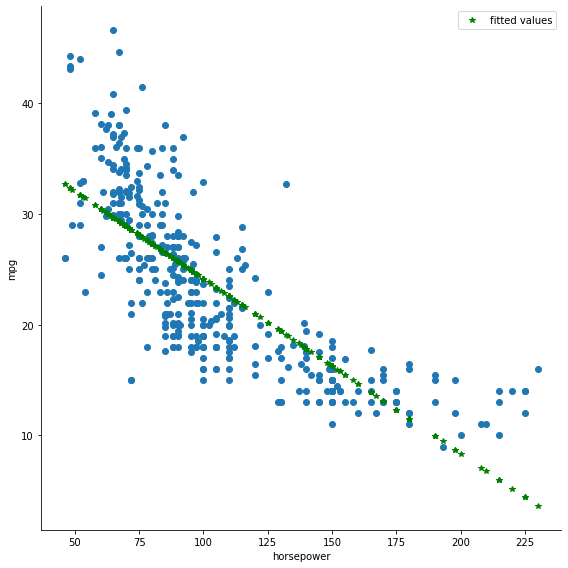

In [37]:
g=sns.FacetGrid(cars, size=8)
g=g.map(plt.scatter, 'horsepower', 'mpg')
plt.plot(cars['horsepower'], model.fittedvalues, marker='*', linestyle='none', color='g', label='fitted values')
plt.legend()

## Question 9

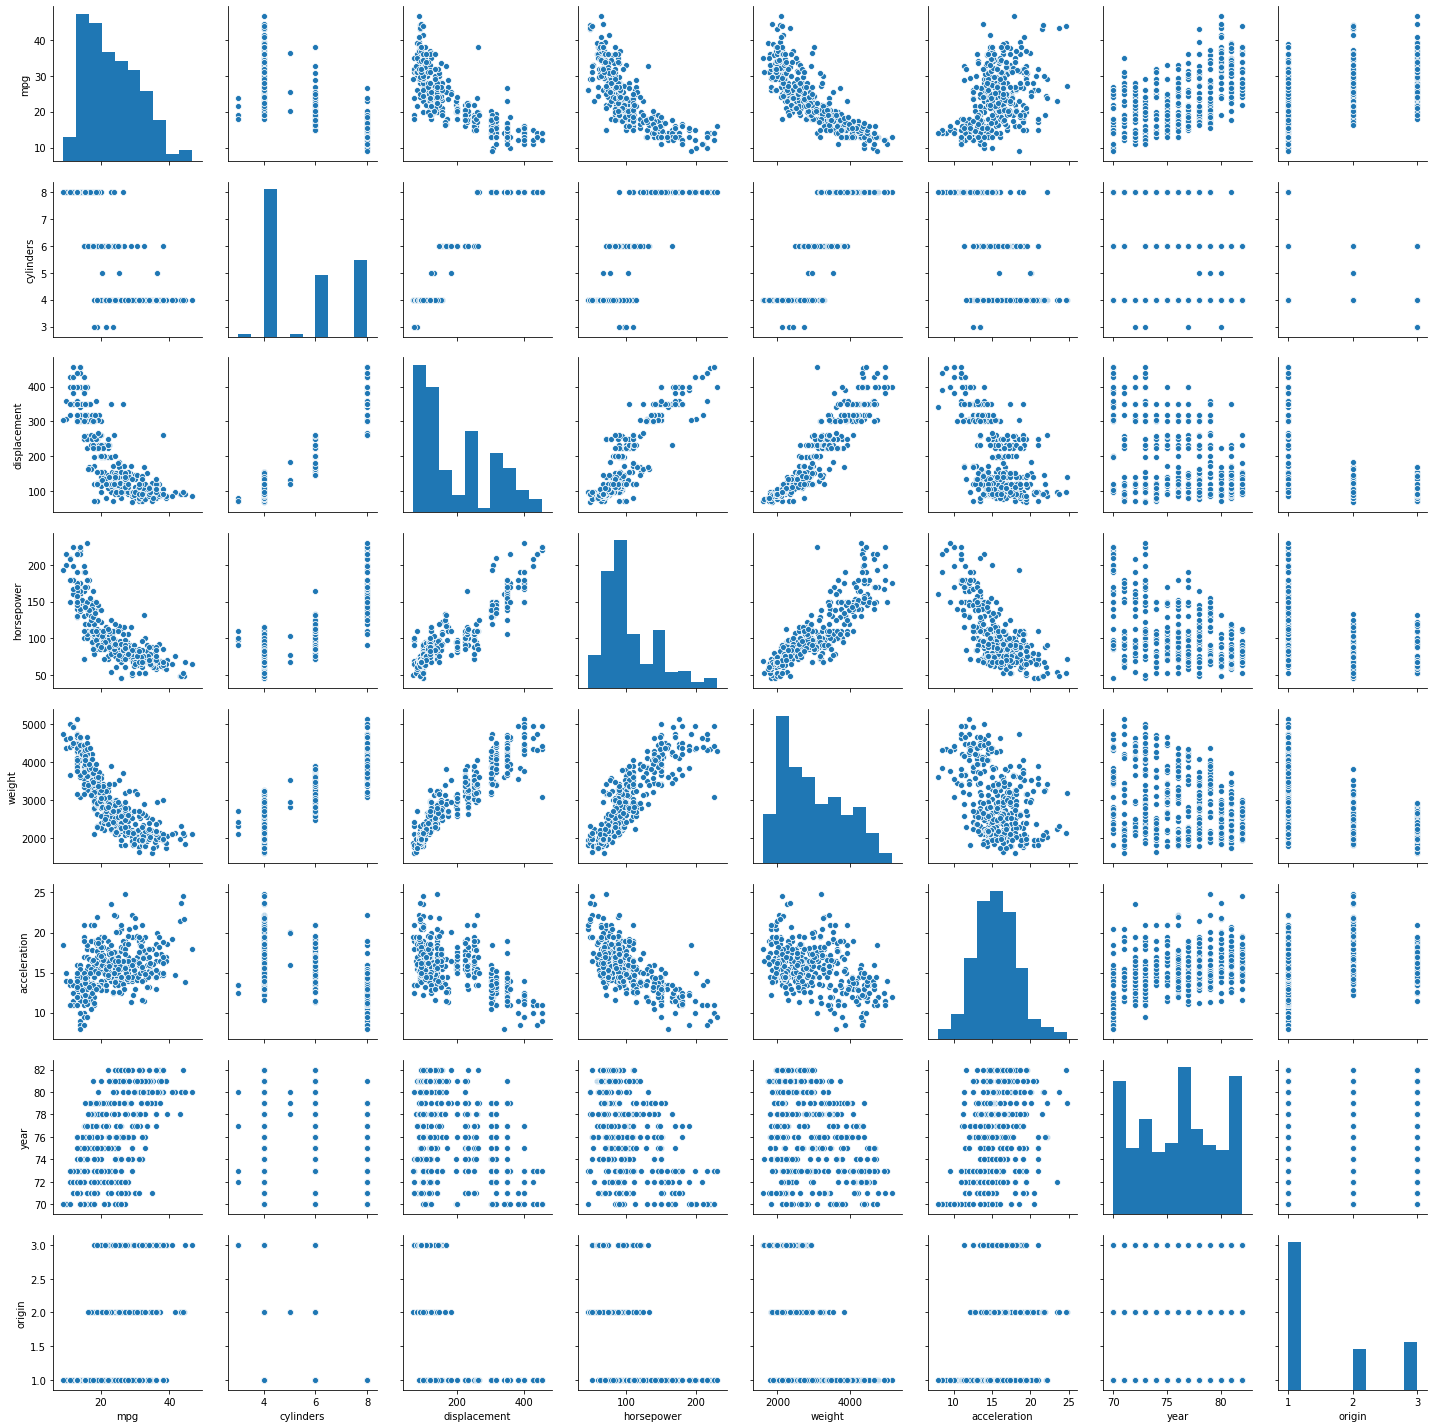

In [39]:
sns.pairplot(cars);

In [40]:
cars.corr()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
mpg,1.000000,-0.777618,-0.805127,-0.778427,-0.832244,0.423329,0.580541,0.565209
cylinders,-0.777618,1.000000,0.950823,0.842983,0.897527,-0.504683,-0.345647,-0.568932
displacement,-0.805127,0.950823,1.000000,0.897257,0.932994,-0.543800,-0.369855,-0.614535
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361,-0.455171
weight,-0.832244,0.897527,0.932994,0.864538,1.000000,-0.416839,-0.309120,-0.585005
acceleration,0.423329,-0.504683,-0.543800,-0.689196,-0.416839,1.000000,0.290316,0.212746
year,0.580541,-0.345647,-0.369855,-0.416361,-0.309120,0.290316,1.000000,0.181528
origin,0.565209,-0.568932,-0.614535,-0.455171,-0.585005,0.212746,0.181528,1.000000


In [67]:
cars_col=" + ".join([f'{i}' for i in cars.columns[1:-1]])
cars_col

In [69]:
model_mult=sms.ols(f'mpg ~ {cars_col}', data=cars).fit()

In [70]:
print(model_mult.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     252.4
Date:                Thu, 16 Apr 2020   Prob (F-statistic):          2.04e-139
Time:                        16:39:11   Log-Likelihood:                -1023.5
No. Observations:                 392   AIC:                             2063.
Df Residuals:                     384   BIC:                             2095.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      -17.2184      4.644     -3.707   

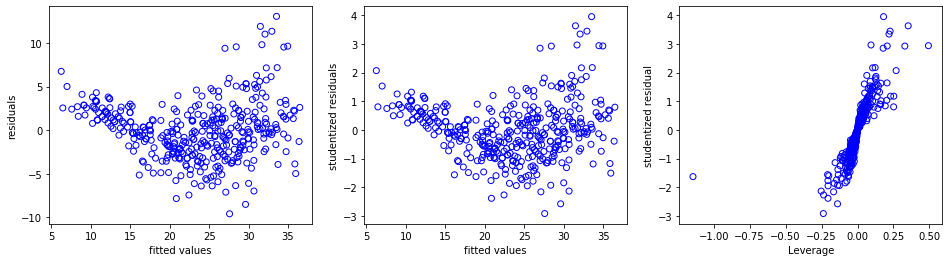

In [73]:
# Obtain the residuals, studentized residuals and the leverages
fitted_values = model_mult.fittedvalues
residuals = model_mult.resid.values
studentized_residuals = OLSInfluence(model_mult).resid_studentized_internal
leverages = OLSInfluence(model_mult).influence

# Plot
fig, (ax1,ax2,ax3) = plt.subplots(1,3,figsize=(16,4))

# Residuals
ax1.scatter(fitted_values, residuals, facecolors='none', edgecolors='b');
ax1.set_xlabel('fitted values');
ax1.set_ylabel('residuals');
# Studentized Residuals
ax2.scatter(fitted_values, studentized_residuals, facecolors='none', edgecolors='b');
ax2.set_xlabel('fitted values');
ax2.set_ylabel('studentized residuals');
# Leverages
ax3.scatter(leverages, studentized_residuals, facecolors='none', edgecolors='b');
ax3.set_xlabel('Leverage');
ax3.set_ylabel('studentized residual');